In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../Course Materials/DATA/sonar.all-data.csv")

In [3]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


<Axes: >

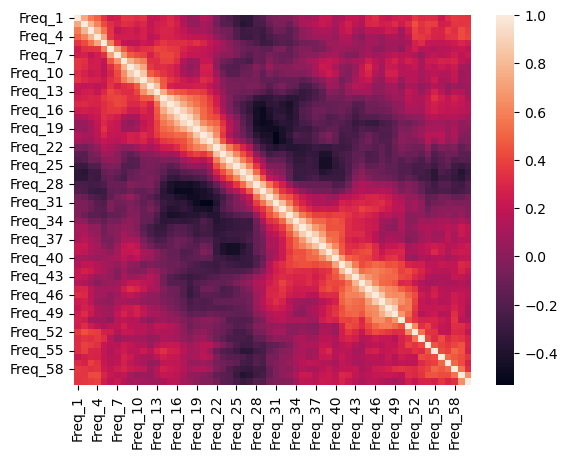

In [4]:
df_ = df.drop('Label',axis=1)
sns.heatmap(df_.corr())

<Axes: >

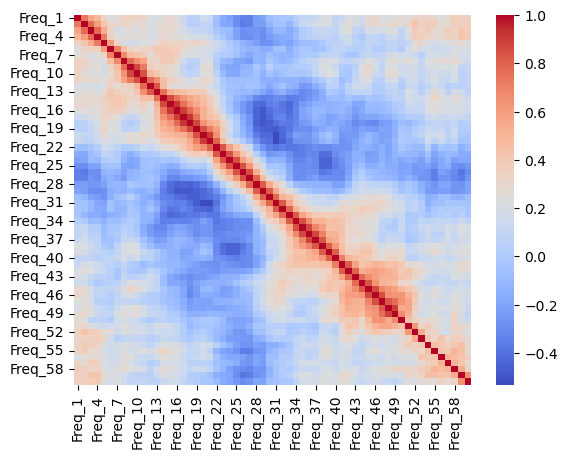

In [35]:
sns.heatmap(df.corr(numeric_only=True),cmap = 'coolwarm')

In [41]:
df['Label'].unique()

array(['R', 'M'], dtype=object)

In [43]:
df['Target'] = df['Label'].map({'R':0,'M':1})
## We do it we cannot directly convert it and see the correlation so we changed it to integer

In [45]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label,Target
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R,0
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R,0
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R,0
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R,0
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R,0


In [ ]:
df.info()

In [51]:
df.corr(numeric_only=True)['Target'].sort_values()

Freq_36   -0.269151
Freq_35   -0.227670
Freq_37   -0.209055
Freq_34   -0.172010
Freq_31   -0.110728
             ...   
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Target     1.000000
Name: Target, Length: 61, dtype: float64

In [55]:
np.abs(df.corr(numeric_only=True)['Target']).sort_values().tail(6)

Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Target     1.000000
Name: Target, dtype: float64

In [21]:
from sklearn.model_selection import train_test_split

In [57]:
X = df.drop(['Target','Label'],axis=1)

In [59]:
y = df['Label']

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [64]:
from sklearn.preprocessing import StandardScaler

In [66]:
from sklearn.neighbors import KNeighborsClassifier

In [68]:
scaler = StandardScaler()

In [72]:
knn = KNeighborsClassifier()

In [74]:
operations = [('scaler',scaler),('knn',knn)]

In [76]:
from sklearn.pipeline import Pipeline

In [80]:
pipe = Pipeline(operations)

In [82]:
from sklearn.model_selection import GridSearchCV

In [84]:
k_values = list(range(1,30))

In [86]:
param_grid = {'knn__n_neighbors':k_values}

In [88]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [90]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [92]:
full_cv_classifier.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=1))])

In [94]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [96]:
full_cv_classifier.cv_results_

{'mean_fit_time': array([0.01129413, 0.00521994, 0.00748882, 0.00699878, 0.00439873,
        0.00380058, 0.00509963, 0.00351911, 0.00398211, 0.00662484,
        0.00570526, 0.00410542, 0.00440149, 0.00342069, 0.00339899,
        0.00371857, 0.00463352, 0.00596771, 0.00459228, 0.00481663,
        0.00570488, 0.00520086, 0.00501142, 0.00536547, 0.00503383,
        0.00539718, 0.00502114, 0.00534525, 0.00499473]),
 'std_fit_time': array([1.36158598e-02, 1.17553427e-03, 1.99162582e-03, 1.13776321e-03,
        4.72043947e-04, 7.48762275e-04, 1.20224409e-03, 6.63254612e-04,
        8.81629629e-04, 1.83627979e-03, 6.04594347e-04, 1.11083818e-03,
        4.83677942e-04, 5.01556391e-04, 4.92282687e-04, 7.08417701e-04,
        1.12132965e-03, 8.91553691e-04, 4.84126020e-04, 3.73763556e-04,
        6.04072361e-04, 3.99594517e-04, 6.30365713e-04, 4.83703308e-04,
        4.41417303e-05, 4.93239135e-04, 6.45350078e-05, 4.30054979e-04,
        9.46566799e-06]),
 'mean_score_time': array([0.06950865, 

In [98]:
pd.DataFrame(full_cv_classifier.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_knn__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011294,0.013616,0.069509,0.123304,1,{'knn__n_neighbors': 1},0.894737,0.710526,0.837838,0.918919,0.864865,0.845377,0.072755,1
1,0.005220,0.001176,0.008178,0.000750,2,{'knn__n_neighbors': 2},0.894737,0.684211,0.810811,0.702703,0.810811,0.780654,0.077732,2
2,0.007489,0.001992,0.012058,0.002124,3,{'knn__n_neighbors': 3},0.894737,0.684211,0.783784,0.729730,0.783784,0.775249,0.070403,3
3,0.006999,0.001138,0.010019,0.001440,4,{'knn__n_neighbors': 4},0.894737,0.657895,0.783784,0.702703,0.756757,0.759175,0.080542,6
4,0.004399,0.000472,0.007905,0.000801,5,{'knn__n_neighbors': 5},0.894737,0.631579,0.783784,0.675676,0.810811,0.759317,0.094765,5
5,0.003801,0.000749,0.008200,0.000748,6,{'knn__n_neighbors': 6},0.894737,0.684211,0.729730,0.648649,0.783784,0.748222,0.086123,7
6,0.005100,0.001202,0.007675,0.000737,7,{'knn__n_neighbors': 7},0.842105,0.657895,0.756757,0.702703,0.837838,0.759459,0.072825,4
7,0.003519,0.000663,0.007208,0.000363,8,{'knn__n_neighbors': 8},0.789474,0.631579,0.783784,0.621622,0.756757,0.716643,0.074413,9
8,0.003982,0.000882,0.007997,0.001264,9,{'knn__n_neighbors': 9},0.789474,0.605263,0.702703,0.675676,0.783784,0.711380,0.069212,10
9,0.006625,0.001836,0.009678,0.001547,10,{'knn__n_neighbors': 10},0.763158,0.657895,0.675676,0.594595,0.729730,0.684211,0.058483,23


<Axes: >

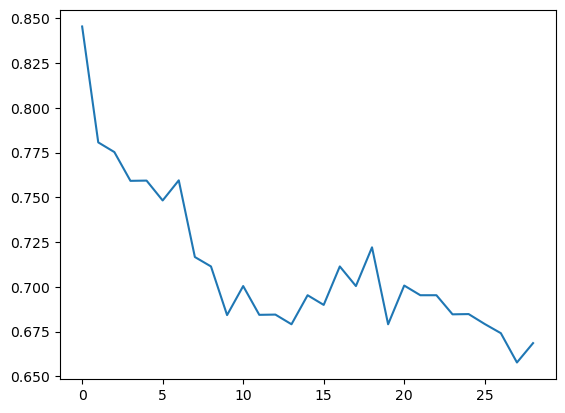

In [100]:
pd.DataFrame(full_cv_classifier.cv_results_)['mean_test_score'].plot()

In [102]:
pd.DataFrame(full_cv_classifier.cv_results_)['mean_test_score']

0     0.845377
1     0.780654
2     0.775249
3     0.759175
4     0.759317
5     0.748222
6     0.759459
7     0.716643
8     0.711380
9     0.684211
10    0.700427
11    0.684353
12    0.684495
13    0.679090
14    0.695306
15    0.689900
16    0.711380
17    0.700427
18    0.722048
19    0.679090
20    0.700711
21    0.695306
22    0.695306
23    0.684637
24    0.684780
25    0.679232
26    0.674111
27    0.657752
28    0.668563
Name: mean_test_score, dtype: float64

In [104]:
y_pred = full_cv_classifier.predict(X_test)

In [106]:
from sklearn.metrics import classification_report,confusion_matrix

In [108]:
confusion_matrix(y_test,y_pred)

array([[12,  1],
       [ 1,  7]], dtype=int64)

In [110]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           M       0.92      0.92      0.92        13
           R       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21

